In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('breast-cancer.csv')  # Importing the dataset 
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.isnull().sum()  # Checking dataset for presence of missing values 

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
df.duplicated().value_counts()  # Checking for duplicated rows

False    569
dtype: int64

In [ ]:
df.dtypes  # Checking if the data type for each feature is appropriate 

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [ ]:
features = df.drop(['id', 'diagnosis'], axis = 1)  # Let features be the variable defining the matrix of features ONLY, 
                                                   # NOT including the labels and ID columns

In [ ]:
labels = df.diagnosis 
labels = labels.apply(lambda x: 1 if x == "M" else 0)   # Manually encoding the labels column: Malignant is represented by 1 and Benign by 0 
labels = labels.astype("str")   # Changing the data type of the column to string 
labels

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: object

In [ ]:
# Standardizing the feature variable due to drastically different measurement magnitudes for different features 

from sklearn.preprocessing import StandardScaler   # Using sklearn for standardization 

scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled)
features_scaled  # features_scaled represents the standardized features data matrix 

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,1.901185,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


In [ ]:
from sklearn.decomposition import PCA  # Importing PCA via sklearn 

pca = PCA()

pca_data = pca.fit_transform(features_scaled) # Determining the transformed feature space defined by PCA - 
                                              # - (projecting the datapoints onto all 30 principal component axis)
pca_data = pd.DataFrame(pca_data)  # Putting the transformed feature space into a dataframe 

columns_list = []
for i in list(range(1,31)):   # Changing the column names to be PC1 to PC30
  columns_list.append("PC" + str(i))

pca_data.columns = columns_list
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.096515,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.077327,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,0.311067,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,0.434193,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.116545,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,0.006888,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,-0.009802,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,-0.036592,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,0.140648,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783


In [ ]:
var_ratio = pca.explained_variance_ratio_  
var_ratio = pd.DataFrame(var_ratio).transpose()
var_ratio  # Below is a dataframe showcasing the proportion of variable explained each Principal Component (PC)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.44272,0.189712,0.093932,0.066021,0.054958,0.040245,0.022507,0.015887,0.013896,0.01169,...,0.000999,0.000915,0.000811,0.000602,0.000516,0.000273,0.00023,0.000053,0.000025,0.000004


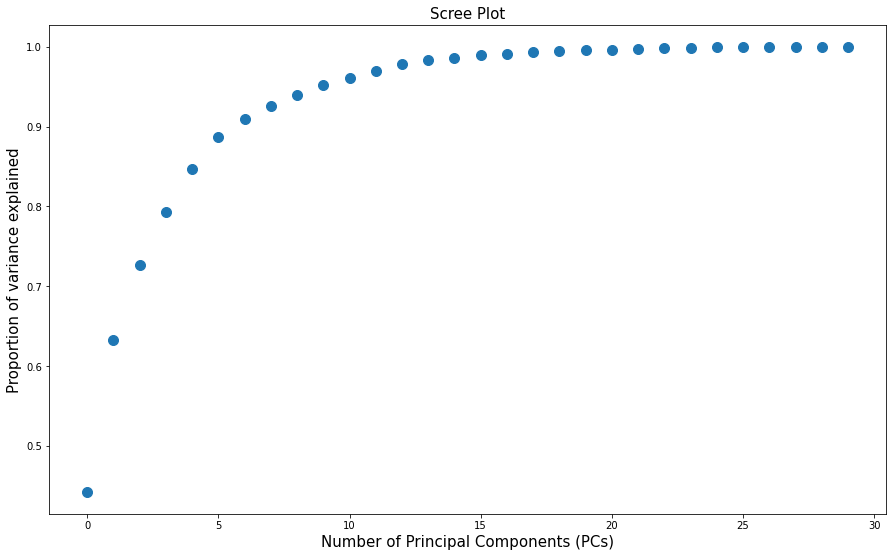

In [ ]:
# Producing and plotting a scree plot to determine the top number of PCs to be used for supervised learning (the top number of PCs explaining more -
# - than 90% of the variation in the data)

y_scree_plot_vals = []
total = 0
for i in var_ratio.columns.tolist():
  total = total + var_ratio[i]
  y_scree_plot_vals.append(total)

plt.figure(figsize = (15,9))
plt.scatter(y = y_scree_plot_vals, x = var_ratio.columns.tolist(), s = 100)
plt.title("Scree Plot", fontsize = 15)
plt.ylabel("Proportion of variance explained", fontsize = 15)
plt.xlabel("Number of Principal Components (PCs)", fontsize = 15)
plt.show()

# We see that the top 7 PCs explains more than 90% of the variation in the data, thus we will use PCs 1-7 in our supervised learning model


## EDA

In [ ]:
pca_data['diagnosis'] = labels 
pca_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,diagnosis
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,...,0.068850,0.084519,-0.175256,-0.151020,-0.201503,-0.252585,-0.033914,0.045648,-0.047169,1
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,...,-0.094578,-0.217718,0.011290,-0.170510,-0.041129,0.181270,0.032624,-0.005687,-0.001868,1
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,...,-0.060309,-0.074291,0.102762,0.171158,0.004735,0.049569,0.047026,0.003146,0.000751,1
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,...,-0.203266,-0.124105,0.153430,0.077496,-0.275225,0.183462,0.042484,-0.069295,-0.019937,1
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,...,-0.017650,0.139454,-0.005332,0.003062,0.039254,0.032168,-0.034786,0.005038,0.021214,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,...,-0.067000,0.088590,0.107898,0.219520,-0.122900,0.159198,0.009853,0.007119,-0.001415,1
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,...,0.019563,-0.055405,0.086135,0.001197,0.065889,-0.068512,-0.023575,-0.027486,-0.010419,1
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,...,0.063352,-0.200312,-0.044819,0.002429,0.007095,-0.023691,-0.002578,0.006706,0.003770,1
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,...,-0.042478,0.168820,-0.195969,0.377830,-0.198192,-0.027409,-0.068086,-0.084163,-0.023783,1


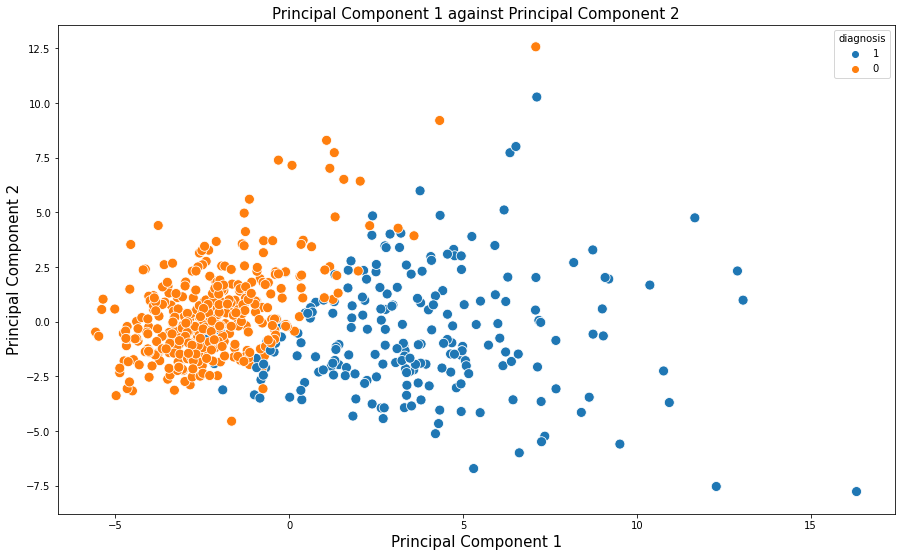

In [ ]:
# plotting a graph of PC1 against PC2 to see the level of linear separability between the 2 classes 

plt.figure(figsize = (15,9))
sns.scatterplot(data = pca_data, x = 'PC1', y = 'PC2', hue = 'diagnosis', s = 100)
plt.title("Principal Component 1 against Principal Component 2", fontsize = 15)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.show()

# We see that there is a relatively strong level of linear separability between the 2 classes with a small number of overlaps, making SVM an - 
# - appropriate algorithm for classification by finding a line maximising the margins between the support vectors 

In [ ]:
# plotting a graph of PC1 against PC2 against PC3 to see the level of linear separability between the 2 classes 

fig = px.scatter_3d(pca_data, x='PC1', y='PC2', z='PC3',
                    color='diagnosis')
fig.show()

# We see that there is a relatively strong level of linear separability between the 2 classes with a small number of overlaps, making SVM an - 
# - appropriate algorithm for classification by finding a hyperplane maximising the margins between the support vectors 

In [ ]:
X = pca_data[['PC1','PC2','PC3','PC4','PC5','PC6','PC7']]  # Letting the feature space for model training and validation be PCs 1-7
Y = pca_data.diagnosis  

from sklearn.model_selection import train_test_split  # Splitting the feature space and labels data into a training and test set using sklearn 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)  # 20% of the original data will be used for validation 

X_train

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
501,2.790400,3.385561,-0.753076,-1.333182,-1.585532,-0.508418,0.207163
494,-2.793331,-1.077888,0.844542,-1.110208,0.004870,0.565603,0.468992
544,-1.665871,-0.213963,-0.148072,-0.197052,0.556480,-0.931582,0.524320
40,-2.150953,-1.923992,-1.180484,-1.113198,0.448472,0.929112,0.041873
449,4.331653,-4.049332,-0.192506,-0.290613,0.610841,-1.423588,-0.670141
...,...,...,...,...,...,...,...
134,2.171416,-2.826261,-0.562107,-0.660832,-0.474970,-0.384447,-0.138893
253,1.314099,-1.775426,-1.672632,0.694620,0.112811,-0.087529,-1.119752
442,-3.454718,-2.136462,0.197163,1.534177,0.942875,-0.937116,0.683263
435,0.664441,0.436861,-2.680782,-0.729227,-0.027787,-1.082051,-0.001051


In [ ]:
from sklearn.svm import SVC  # Import the Support Vector Classifier (SVC)

model1 = SVC() 
model1.fit(X_train,y_train)  # Fit the SVC to the training data 

SVC()

In [ ]:
model1.score(X_train, y_train)  # Evaluating the level of overfitting within the data - we see that the model does indeed seem to overfit to the - 
                                # - data in classifying the training data correctly 

0.978021978021978

In [ ]:
model1.score(X_test, y_test)  # However evaluating the accuracy in predicting the test data, we see that the model does seem to generalize well to - 
                              # - unseen data indicating the SVC is appropriate in classfying patients into one of the two classes 

0.9649122807017544